In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: Image data of dtype object cannot be converted to float

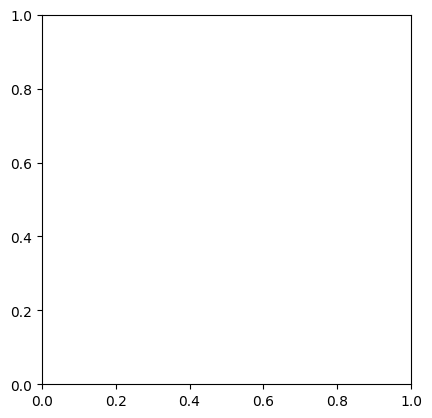

In [3]:
img=cv2.imread(r"C:\Users\aman\Desktop\CVDL\LAB2\pexels-marina-zvada-844583049-30388802.jpg")
plt.imshow(img)

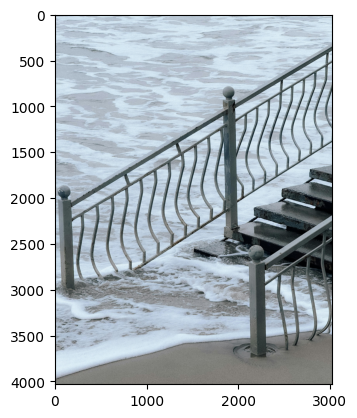

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(4032, 3024, 3)

In [ ]:
sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)


In [ ]:
type(sobel_x)

numpy.ndarray

In [ ]:
sobel_x.shape

(4032, 3024, 3)

In [ ]:
sobel_x.max()

940.0

In [ ]:
sobel_y.min()

-910.0

In [ ]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [ ]:


def apply_canny_edge_detection(img,low_threshold, high_threshold):
    image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    if image is None:
        raise FileNotFoundError(f"Image not found ")

    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)
    plt.imshow(blurred_image)


    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

    return image, edges






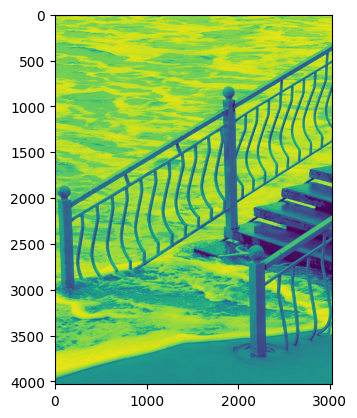

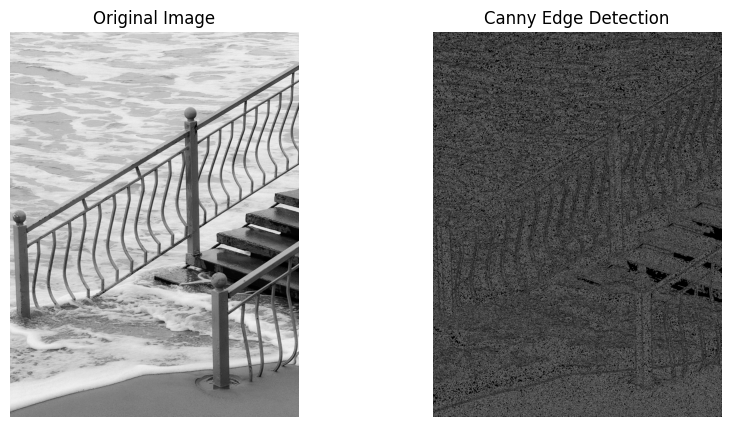

In [ ]:

low_threshold = 10
high_threshold = 30

    
try:
    original_image, edges = apply_canny_edge_detection(img, low_threshold, high_threshold)

    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Canny Edge Detection")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.show()
except FileNotFoundError as e:
    print(e)

In [ ]:

def laplacian_of_gaussian(image, kernel_size, sigma):
    
    if image is None:
        raise FileNotFoundError(f"Image not found ")

    # Apply Gaussian Blur to smoothen the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

    # Apply the Laplacian operator
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Take the absolute value to ensure the edges are visible
    edges = np.uint8(np.abs(laplacian))

    return image, blurred_image, edges



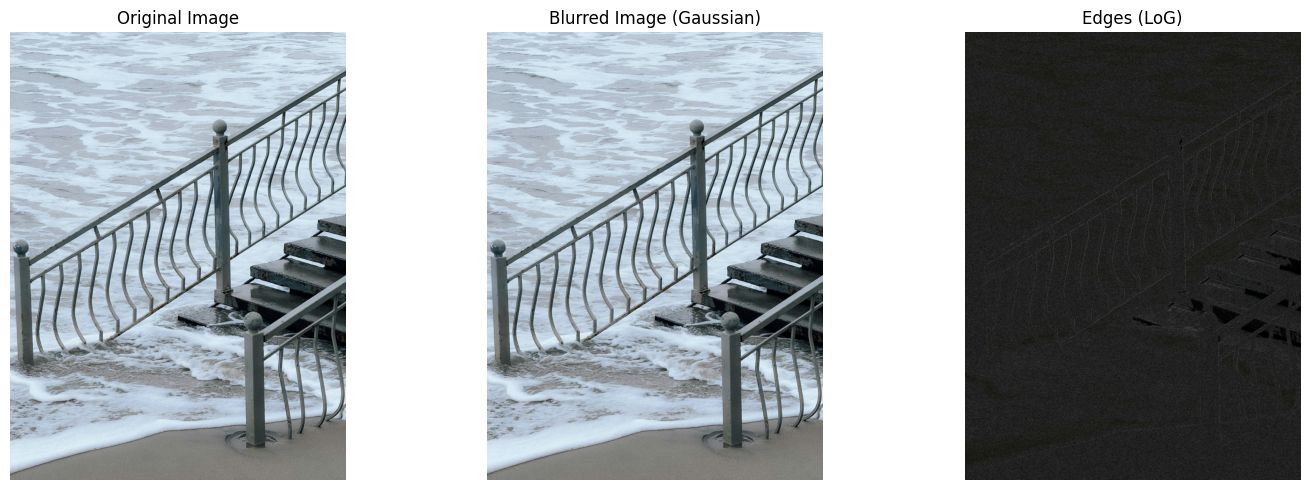

In [ ]:
try:
    original_image, blurred_image, edges = laplacian_of_gaussian(img,11,0.5)

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Blurred Image (Gaussian)")
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Edges (LoG)")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)

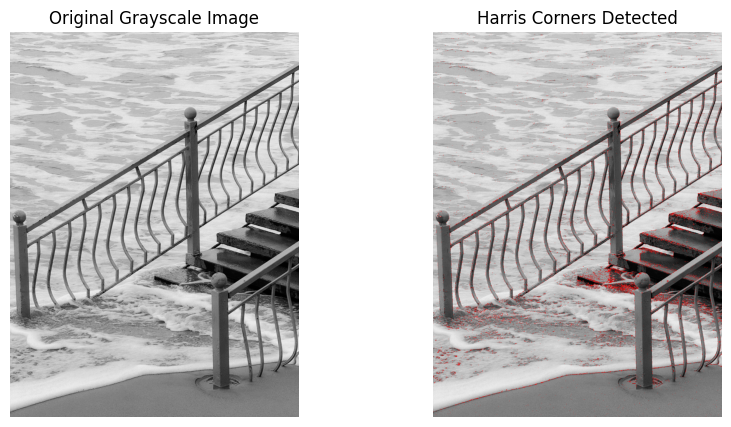

In [5]:

def harris_corner_detection(image_path, block_size=2, ksize=3, k=0.04):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert the grayscale image to a color image (for visualization)
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Harris Corner Detection
    corners = cv2.cornerHarris(image, blockSize=block_size, ksize=ksize, k=k)

    # Dilate the corners to enhance visibility
    corners_dilated = cv2.dilate(corners, None)

    # Mark corners on the image
    color_image[corners_dilated > 0.01 * corners_dilated.max()] = [0, 0, 255]  # Red for corners

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Harris Corners Detected")
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Parameters for Harris Corner Detection
image_path = r'C:\Users\aman\Desktop\CAPSTONE\CVDL\LAB2\pexels-marina-zvada-844583049-30388802.jpg'  # Replace with your image path
block_size = 2  # Neighborhood size for corner detection
ksize = 3       # Aperture size for the Sobel operator
k = 0.04        # Harris detector free parameter

try:
    harris_corner_detection(image_path, block_size, ksize, k)
except FileNotFoundError as e:
    print(e)
